In [4]:
import xarray as xr
import numpy as np
import datetime
import pandas as pd
from pandas import Series
from pandas import DateOffset
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid
from mpl_toolkits.axes_grid1.axes_divider import make_axes_area_auto_adjustable

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.geoaxes import GeoAxes

In [5]:
# SCF _wrf
ds_wrf_1980 = xr.open_dataset('./data/large_files/DOE_VIC.narr_wrf.daily.snowcover.1980-2012.nc')
ds_wrf_2091 = xr.open_dataset('./data/large_files/DOE_VIC.narr_wrf.daily.snowcover.2091-2100.nc')

# SCF _loca_wrf
ds_loca_wrf_1980 = xr.open_dataset('./data/large_files/DOE_VIC.narr_LOCA_wrf.daily.snowcover.1980-2012.nc')
ds_loca_wrf_2091 = xr.open_dataset('./data/large_files/DOE_VIC.narr_LOCA_wrf.daily.snowcover.2091-2100.nc')

# SCF _loca_14
ds_loca_14_1980 = xr.open_dataset('./data/large_files/DOE_VIC.narr_LOCA_L14.daily.snowcover.1980-2012.nc')
ds_loca_14_2091 = xr.open_dataset('./data/large_files/DOE_VIC.narr_LOCA_L14.daily.snowcover.2091-2100.nc')

# SCF _bcsd_L14
ds_bcsd_L14_1980 = xr.open_dataset('./data/large_files/DOE_VIC.narr_BCSD_L14.daily.snowcover.1980-2012.nc')
ds_bcsd_L14_2091 = xr.open_dataset('./data/large_files/DOE_VIC.narr_BCSD_L14.daily.snowcover.2091-2100.nc')

In [6]:
scf_wrf_1991 = ds_wrf_1980['snowcover'].sel(time=slice('1991-04-01', '2000-12-31'))
scf_loca_wrf_1991 = ds_loca_wrf_1980['snowcover'].sel(time=slice('1991-04-01', '2000-12-31'))
scf_loca_14_1991 = ds_bcsd_L14_1980['snowcover'].sel(time=slice('1991-04-01', '2000-12-31'))
scf_bcsd_L14_1991 = ds_bcsd_L14_1980['snowcover'].sel(time=slice('1991-01-01', '2000-12-31'))

### Setting up the date range

In [7]:
# Creating a pandas datetime range to collect data every year on April 1st
# resource: https://stackoverflow.com/questions/32168848/how-to-create-a-pandas-datetimeindex-with-year-as-frequency

past_range = pd.date_range('1991-04-01', periods=10, freq=pd.DateOffset(years=1))
future_range = pd.date_range('2091-04-01', periods=10, freq=pd.DateOffset(years=1))
future_range


DatetimeIndex(['2091-04-01', '2092-04-01', '2093-04-01', '2094-04-01',
               '2095-04-01', '2096-04-01', '2097-04-01', '2098-04-01',
               '2099-04-01', '2100-04-01'],
              dtype='datetime64[ns]', freq='<DateOffset: years=1>')

In [8]:
# Formatting dates to strings. Not needed
# frmtd_past_dates = [date.strftime('%Y-%m-%d') for date in past_range]
# frmtd_past_dates

In [9]:
#test_data = []
#for date in past_range:
#    test_data.append(scf_wrf_1991.sel(time=date))

varname = 'snowcover'

### Mean difference of narr_wrf

In [10]:
combined_scf_wrf_past = xr.concat([i for i in [scf_wrf_1991.sel(time=date) for date in past_range]], 'time')
combined_scf_wrf_future = xr.concat([i for i in [ds_wrf_2091[varname].sel(time=date) for date in future_range]], 'time')
combined_scf_wrf_future


<xarray.DataArray 'snowcover' (time: 10, latitude: 128, longitude: 112)>
array([[[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       ...,

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -123.96875 -123.90625 -123.84375 ...
  * latitude   (latitude) float32 35.03125 35.09375 35.15625 35.21875 ...
  * time       (time) datetime64[ns] 2091-04-01 2092-04-01 2093-04-01 ...
Attributes:
    long_name:  snow_cover_fractio

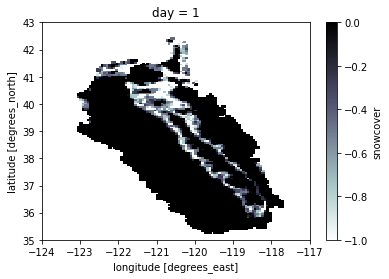

In [11]:
wrf_res = (combined_scf_wrf_future.groupby('time.day').median('time') - combined_scf_wrf_past.groupby('time.day').median('time'))
wrf_res.plot(cmap='bone_r')

### Mean difference of narr_loca_wrf

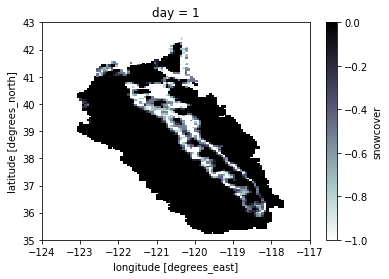

In [12]:
combined_scf_loca_wrf_past = xr.concat([i for i in [scf_loca_wrf_1991.sel(time=date) for date in past_range]], 'time')
combined_scf_loca_wrf_future = xr.concat([i for i in [ds_loca_wrf_2091['snowcover'].sel(time=date) for date in future_range]], 'time')


loca_wrf_res = (combined_scf_loca_wrf_future.groupby('time.day').median('time') - combined_scf_loca_wrf_past.groupby('time.day').median('time'))
loca_wrf_res.plot(cmap='bone_r')

### Mean difference of narr_loca_14

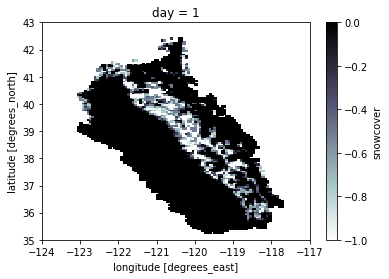

In [13]:
combined_scf_loca_14_past = xr.concat([i for i in [scf_loca_14_1991.sel(time=date) for date in past_range]], 'time')
combined_scf_loca_14_future = xr.concat([i for i in [ds_loca_14_2091['snowcover'].sel(time=date) for date in future_range]], 'time')

loca_14_res = (combined_scf_loca_14_future.groupby('time.day').median('time') - combined_scf_loca_14_past.groupby('time.day').median('time'))
loca_14_res.plot(cmap='bone_r')

### Mean difference of narr_bcsd_14

In [14]:
combined_scf_bcsd_L14_past = xr.concat([i for i in [scf_bcsd_L14_1991.sel(time=date) for date in past_range]], 'time')
combined_scf_bcsd_L14_future = xr.concat([i for i in [ds_bcsd_L14_2091['snowcover'].sel(time=date) for date in future_range]], 'time')



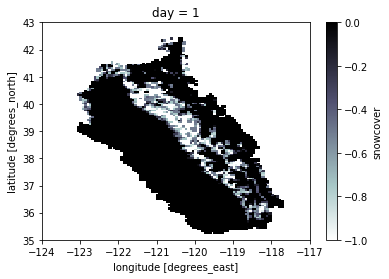

In [15]:
bcsd_res = (combined_scf_bcsd_L14_future.groupby('time.day').median('time') - combined_scf_bcsd_L14_past.groupby('time.day').median('time'))
bcsd_res.plot(cmap='bone_r')

## Multi-plots

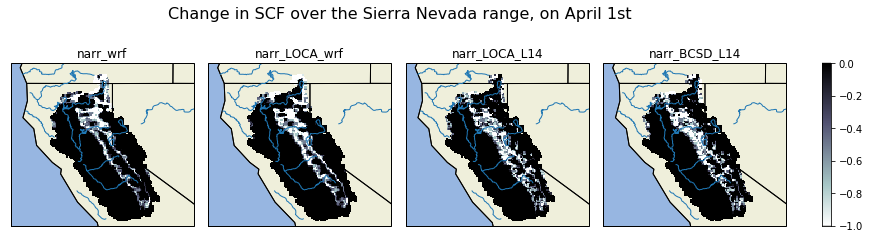

In [17]:



mean_list = [wrf_res, loca_wrf_res, loca_14_res, bcsd_res]

# Configuration for the map
projection = ccrs.PlateCarree()
axes_class = (GeoAxes, dict(map_projection=projection))
fig = plt.figure(figsize=(15, 15))
axgr = AxesGrid(fig, 
                111, 
                axes_class=axes_class,
                nrows_ncols=(1, 4),
                axes_pad=0.2,
                share_all=True,
                label_mode="",
                cbar_location="right",
                cbar_mode="single",
                cbar_pad=0.5
               )
cbar_label_title = ''


for i, ax in enumerate(axgr):
    ax.add_feature(cfeature.BORDERS)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.STATES)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.LAKES)
    ax.add_feature(cfeature.LAND)    
    ax.add_feature(cfeature.LAKES.with_scale('10m'), facecolor='none', edgecolor='tab:blue')
    ax.add_feature(cfeature.RIVERS.with_scale('10m'), edgecolor='tab:blue')   
    # setting the location t
    ax.set_extent([-125, -116, 43, 35])

    djf_plt = mean_list[i].plot(ax=axgr[i], transform=ccrs.PlateCarree(), x='longitude', y='latitude', cmap='bone_r', add_colorbar=False)
    

axgr[0].set_title('narr_wrf')
axgr[1].set_title('narr_LOCA_wrf')
axgr[2].set_title('narr_LOCA_L14')
axgr[3].set_title('narr_BCSD_L14')

fig.subplots_adjust(left=0.14, top=1.64)
fig.suptitle('Change in SCF over the Sierra Nevada range, on April 1st', fontsize=16, y=1.01)
cb = axgr.cbar_axes[0].colorbar(djf_plt)
#cb.set_label_text(cbar_label_title)       # color bar title not needed for SCF since it is a fraction